# BANK APP REVIEWS - CBE

In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [2]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# variable
BANK="CBE"

In [5]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [6]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/CBE_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (500, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,fce00cda-d71a-486e-a4c2-7479ab7793bc,Abdurahiman Abubaker Hussein,https://play-lh.googleusercontent.com/a/ACg8oc...,best app of finance,5,0,NaN,2025-06-04 07:38:54,NaN,NaN
1,f543a13e-bc0f-4348-b57f-3a83eb67206c,Milky Yebassa,https://play-lh.googleusercontent.com/a/ACg8oc...,yetemeta,1,0,5.1.0,2025-06-03 21:04:44,NaN,NaN
2,2470d199-834a-4134-a0f9-8c684ba75491,ENGIDA KEBEDE,https://play-lh.googleusercontent.com/a-/ALV-U...,Engida Kebede Fetera,5,0,5.1.0,2025-06-03 20:20:23,NaN,NaN
3,4beee0dd-05ad-474c-bdff-0146723f2179,Abel Beyena,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,5.1.0,2025-06-03 11:32:52,NaN,NaN
4,428e5117-387f-4c9d-b095-3230e3f83a8a,Senayt Weldeslase,https://play-lh.googleusercontent.com/a/ACg8oc...,it is not safety,1,0,5.1.0,2025-06-03 09:14:31,NaN,NaN


### Dataset Overview

In [7]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
458,3e538d9f-cec3-4f37-ad3d-547d33729ea5,Murad Biru,https://play-lh.googleusercontent.com/a-/ALV-U...,best,5,0,5.1.0,2025-05-23 05:49:33,NaN,NaN
45,9178649b-de1e-4cda-b5c0-b818fcfb560a,Demlash Demlash,https://play-lh.googleusercontent.com/a/ACg8oc...,wow,4,1,5.1.0,2025-05-24 09:26:38,NaN,NaN
167,beae4fab-d673-4120-ba42-ea1bf94a737f,Araya Abrham,https://play-lh.googleusercontent.com/a-/ALV-U...,the worst commercial company that fails to do ...,1,1,5.1.0,2025-05-03 11:10:57,NaN,NaN
211,0c9b996b-a42e-4500-84fa-1d5eb764f490,Abdusalam Mohamad,https://play-lh.googleusercontent.com/a/ACg8oc...,Masha alla,5,0,5.1.0,2025-05-31 14:37:05,NaN,NaN
122,7fbce453-198b-401e-ab72-5f778309cd92,Reem Khalil,https://play-lh.googleusercontent.com/a-/ALV-U...,Please kindly ask to update the app and allow ...,2,0,NaN,2025-05-14 15:14:19,NaN,NaN
197,b342c5a9-72f5-4399-8848-01973d4844fe,muktar mohamed,https://play-lh.googleusercontent.com/a-/ALV-U...,super,5,0,5.1.0,2025-04-26 16:12:32,NaN,NaN
285,5a727b0d-4427-4abe-8e9f-9e36369c849c,Nesredin Seid,https://play-lh.googleusercontent.com/a-/ALV-U...,good app,5,0,5.1.0,2025-05-21 16:20:26,NaN,NaN
119,9954b052-2fbe-4d52-8a5e-7f92f70b3dd5,Zelalem Tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,Good job👍,5,0,5.1.0,2025-05-14 23:26:07,NaN,NaN
366,beae4fab-d673-4120-ba42-ea1bf94a737f,Araya Abrham,https://play-lh.googleusercontent.com/a-/ALV-U...,the worst commercial company that fails to do ...,1,1,5.1.0,2025-05-03 11:10:57,NaN,NaN
175,77d6154d-7008-47ba-8d70-2493451352a3,Abdulkarim Abdala,https://play-lh.googleusercontent.com/a-/ALV-U...,Best the best fast,5,0,5.1.0,2025-05-02 17:41:29,NaN,NaN


In [8]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
495,26fd7f14-c17f-4081-8910-45f2008ca145,Ephrem Berhanu,https://play-lh.googleusercontent.com/a/ACg8oc...,the screenshot and the reffresh options are so...,2,0,NaN,2025-05-21 07:02:44,NaN,NaN
496,b22fe51f-e673-41ae-a625-2f8f1cce76ee,Samuel Solomon,https://play-lh.googleusercontent.com/a-/ALV-U...,poor service,1,0,5.1.0,2025-05-21 00:22:33,NaN,NaN
497,724eed5b-dd3a-47c2-865c-b6b63437c650,Kal Eldu,https://play-lh.googleusercontent.com/a/ACg8oc...,amazing,5,0,5.1.0,2025-05-20 19:28:06,NaN,NaN
498,9eff9bee-1e05-4f68-ae9a-2de67b8564bc,Daniel Abera,https://play-lh.googleusercontent.com/a/ACg8oc...,it is reliable and easy to use.,5,0,5.1.0,2025-05-20 17:50:21,NaN,NaN
499,cdad77fa-fadb-494d-970c-d816e2f6a83d,Yeabfana Berhanu,https://play-lh.googleusercontent.com/a/ACg8oc...,the most annoying mobile banking app I've ever...,1,0,5.1.0,2025-05-20 17:21:51,NaN,NaN


In [9]:
#shape of the dataset
df.shape

(500, 10)

In [10]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [11]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,500.0,4.072,1.543886,1.0,4.0,5.0,5.0,5.0
thumbsUpCount,500.0,0.336,2.174525,0.0,0.0,0.0,0.0,26.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,500,201,fce00cda-d71a-486e-a4c2-7479ab7793bc,3
userName,500,201,Abdurahiman Abubaker Hussein,3
userImage,500,201,https://play-lh.googleusercontent.com/a/ACg8oc...,3
content,500,165,good,33
reviewCreatedVersion,391,4,5.1.0,381
at,500,201,2025-06-04 07:38:54,3


In [13]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              500 non-null    object 
 1   userName              500 non-null    object 
 2   userImage             500 non-null    object 
 3   content               500 non-null    object 
 4   score                 500 non-null    int64  
 5   thumbsUpCount         500 non-null    int64  
 6   reviewCreatedVersion  391 non-null    object 
 7   at                    500 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


In [14]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                201
userName                201
userImage               201
at                      201
content                 165
thumbsUpCount             7
score                     5
reviewCreatedVersion      4
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [15]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [16]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,109,21.80%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [17]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,500,100.00%
repliedAt,500,100.00%
reviewCreatedVersion,109,21.80%


### Duplicates

In [18]:
#count duplicates
dq.count_duplicates()

298

In [19]:
#look at the duplicates
dq.display_duplicates().sample(10)

[INFO] Found 298 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
267,310cffb5-629d-4f32-b55c-aff448ddad2d,Fahmi Aman,https://play-lh.googleusercontent.com/a-/ALV-U...,user-friendly apps.because this app is easy.,5,1,5.1.0,2025-05-22 16:46:03,NaN,NaN
428,55381137-2212-4d86-9e3b-37b0910b9107,Epheram Teklae,https://play-lh.googleusercontent.com/a/ACg8oc...,good job,5,0,NaN,2025-05-26 12:31:42,NaN,NaN
270,34d6492b-f6e7-42ed-851a-348ab215c36a,Addisu Adinew,https://play-lh.googleusercontent.com/a-/ALV-U...,sync problem may 22 2025 but the date stack on...,5,0,5.1.0,2025-05-22 16:03:46,NaN,NaN
492,30cfce0b-7504-425f-89a9-8091ffa24920,Belay Bezabih,https://play-lh.googleusercontent.com/a-/ALV-U...,"this app is very useful app,it saves time,and ...",4,1,5.1.0,2025-05-21 11:43:38,NaN,NaN
377,7dcbcd69-baa0-4c8c-a3a2-4a2cf0d959d1,Zerihun Adugna,https://play-lh.googleusercontent.com/a/ACg8oc...,fast and reliable,5,0,NaN,2025-05-02 17:09:37,NaN,NaN
359,fb3a4e37-bf12-44d3-842f-06994277596e,Dereje Messelle,https://play-lh.googleusercontent.com/a-/ALV-U...,አዛ,1,0,NaN,2025-05-04 17:41:19,NaN,NaN
413,8bf4df47-c266-4152-9790-4217143b3a91,Amanuel Gedefaw,https://play-lh.googleusercontent.com/a/ACg8oc...,Recently there is big problem when sending to ...,2,1,5.1.0,2025-05-31 11:30:33,NaN,NaN
265,beef426f-6270-49b7-9f5a-ae9bc8cc3690,Kaf Delil,https://play-lh.googleusercontent.com/a-/ALV-U...,ok,5,0,5.1.0,2025-05-22 17:50:33,NaN,NaN
453,a68dfd3a-aaa3-48bc-84b8-842311de1b8c,MUHAMMAD Shifa (Shifa),https://play-lh.googleusercontent.com/a-/ALV-U...,why you change default network?,5,0,5.1.0,2025-05-23 18:14:51,NaN,NaN
498,9eff9bee-1e05-4f68-ae9a-2de67b8564bc,Daniel Abera,https://play-lh.googleusercontent.com/a/ACg8oc...,it is reliable and easy to use.,5,0,5.1.0,2025-05-20 17:50:21,NaN,NaN


### Invalid Values

In [20]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [21]:
#saving the original dataset for later use
df_original=df.copy()

In [22]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 298 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
175,77d6154d-7008-47ba-8d70-2493451352a3,Abdulkarim Abdala,https://play-lh.googleusercontent.com/a-/ALV-U...,Best the best fast,5,0,5.1.0,2025-05-02 17:41:29,NaN,NaN
20,aa3d99be-ecdc-4651-ad1e-347f0f8cd3e2,Haider Sadik,https://play-lh.googleusercontent.com/a/ACg8oc...,yes good,5,0,5.1.0,2025-05-28 15:56:18,NaN,NaN
12,0c9b996b-a42e-4500-84fa-1d5eb764f490,Abdusalam Mohamad,https://play-lh.googleusercontent.com/a/ACg8oc...,Masha alla,5,0,5.1.0,2025-05-31 14:37:05,NaN,NaN
54,2938c3f2-fa9c-4847-98e1-b0bfc57cb614,Abdul Jalil,https://play-lh.googleusercontent.com/a-/ALV-U...,very nice 👍,5,0,5.1.0,2025-05-23 17:27:51,NaN,NaN
187,8096ea90-64d7-4416-9558-1f7b7ca73cde,Tefera Tekle,https://play-lh.googleusercontent.com/a-/ALV-U...,It crashes frequently,4,0,5.1.0,2025-04-30 07:14:38,NaN,NaN


In [23]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [24]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
78,f52e56b1-7c66-4e8f-942d-06f23ea3ecae,Kal,https://play-lh.googleusercontent.com/a/ACg8oc...,oldie,1,0,5.1.0,2025-05-22 00:55:50,NaN,NaN
50,dad4e463-c5b1-47bc-a193-84741470825e,Fami Hussen,https://play-lh.googleusercontent.com/a-/ALV-U...,accessible to using,5,0,5.1.0,2025-05-23 23:26:13,NaN,NaN
184,8e47f061-c03d-477d-83d7-9e9ef8fbd85f,abu ismail,https://play-lh.googleusercontent.com/a/ACg8oc...,not bad not good,1,0,5.1.0,2025-05-02 14:57:44,NaN,NaN
58,3e538d9f-cec3-4f37-ad3d-547d33729ea5,Murad Biru,https://play-lh.googleusercontent.com/a-/ALV-U...,best,5,0,5.1.0,2025-05-23 05:49:33,NaN,NaN
144,684fd27d-fb21-4f26-a3a2-2df5c05d35b8,Shafi Kedir,https://play-lh.googleusercontent.com/a/ACg8oc...,All service of Mobile Banking,5,0,NaN,2025-05-06 15:35:31,NaN,NaN


In [25]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [26]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [27]:
dq.find_invalid_values()

{}

In [28]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [29]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=fr&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=best+app "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=af&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=Awesome+bank "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=malkaamuu+Jiidhaa+Namoo "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=sl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=i+love+it+love+love "HTTP/2 200 OK

In [30]:
df.shape

(202, 5)

### Inconsistencies and Inaccuracies

In [31]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [32]:
df=dq.convert_columns_to_datetime()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 411
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       202 non-null    object
 1   content        202 non-null    object
 2   score          202 non-null    int64 
 3   thumbsUpCount  202 non-null    int64 
 4   at             202 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.5+ KB


In [34]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [35]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [36]:
df["bank"] = BANK  # add bank name column

In [37]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank
169,Very good app. but disappointed by general ces...,5,2025-05-02 21:48:08,Mebratu Mathewos,1,CBE
75,I like,5,2025-05-22 02:52:56,Mame Mame,0,CBE
85,very nice app for android phone,5,2025-05-21 17:28:54,Abdule Yube,0,CBE
49,Fantastic,5,2025-05-23 23:51:45,Mikiyas Mereke,0,CBE
88,በጣም ከርፋፋ,1,2025-05-21 14:37:48,Lele Apostle,0,CBE
134,Am sorry but what does developer mode do to th...,1,2025-05-08 19:55:11,Fraol0 (Main),0,CBE
152,If any developer is reading this please fix th...,1,2025-05-05 21:48:43,Nahom M,1,CBE
155,wow,1,2025-05-05 12:25:17,KINGO A,0,CBE
194,I need support you,5,2025-04-27 00:36:30,Zeeynii Ahmad,0,CBE
4,it is not safety,1,2025-06-03 09:14:31,Senayt Weldeslase,0,CBE


### Export Cleaned Data

In [38]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze & Visualize

In [39]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


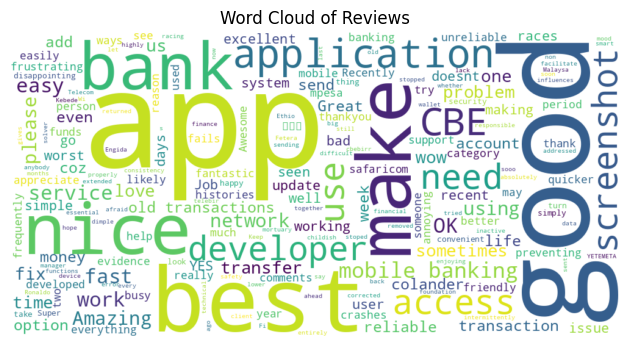

In [40]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


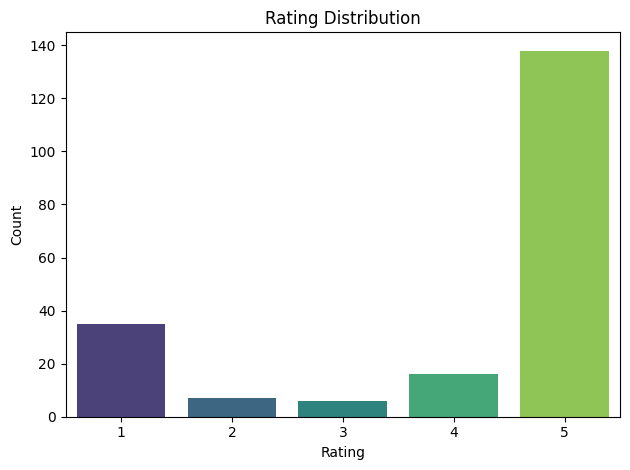

In [41]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


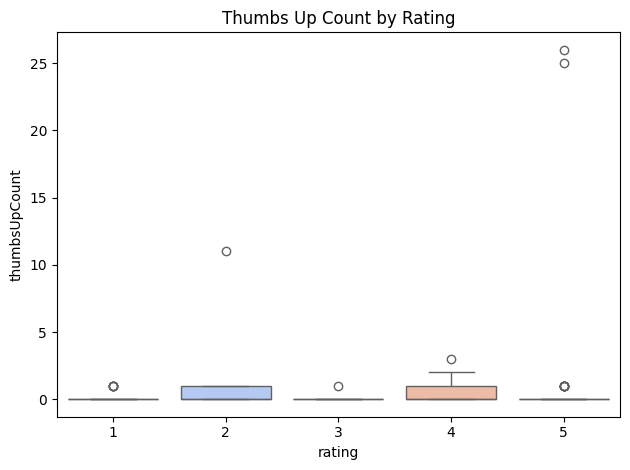

In [42]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


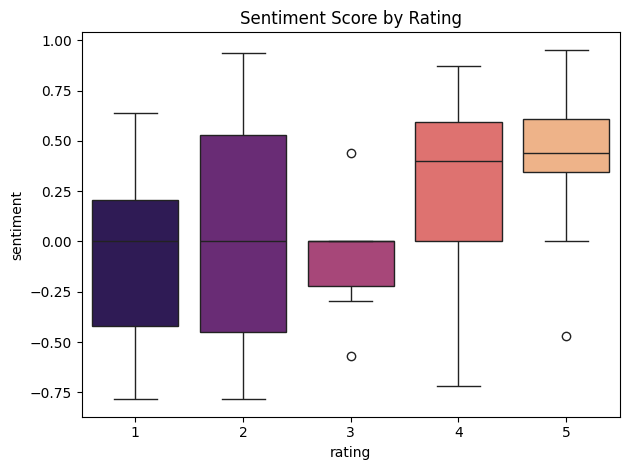

In [43]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [44]:
df.sample(15)

,review,rating,date,userName,thumbsUpCount,bank
399,the Best,1,2025-04-26 11:51:19,Gazany Hhh,0,CBE
14,Better Service,5,2025-05-31 07:28:05,Mule Doni,0,CBE
130,This app don't have self activation only you h...,1,2025-05-10 07:15:08,Nuredin Muhammed,1,CBE
11,this app has developed in a very good ways but...,5,2025-05-31 21:21:18,Mac Meshesha,26,CBE
188,the best,5,2025-04-28 20:52:10,Harun Taha,0,CBE
128,Funds transferred from the same bank do not re...,3,2025-05-11 11:04:05,Michael M,1,CBE
411,this app has developed in a very good ways but...,5,2025-05-31 21:21:18,Mac Meshesha,25,CBE
22,i like everything of this app,5,2025-05-27 21:34:01,Melese Mekonnen Taf,0,CBE
5,Nice Bank,5,2025-06-03 08:42:36,alem haylay,0,CBE
83,Best app,5,2025-05-21 19:19:48,Lali Teshome,0,CBE
